In [50]:
# Bi - Gram Model

## Importing Data 

In [51]:
import pandas as pd
import torch
words = open('names.txt').read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

# Characters to Integer conversion 

In [53]:
chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] =0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [61]:
## Now Similarly we need to create the integer to string converter
itos = {i: s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

## Creating the Null tensor matix to make the count vector/tensor

In [62]:
N = torch.zeros((27,27), dtype = torch.int32) # we have only 27 charcters
pd.DataFrame(N)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
#example if wanna add some value to tensor
k = N

k[0,0] +=1 # simply we are increaing the count at specific row and column
k[0,1] +=1
pd.DataFrame(k)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# this snippet gives us the count for first 4 words only 
Count_Tensor = N
for w in words[:4]:
    chs = ['.'] + list(w)
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,':',ix1 ,'&', ch2,':', ix2)
        Count_Tensor[ix1, ix2] +=1
pd.DataFrame(Count_Tensor)

. : 0 & e : 5
e : 5 & m : 13
m : 13 & m : 13
m : 13 & a : 1
. : 0 & o : 15
o : 15 & l : 12
l : 12 & i : 9
i : 9 & v : 22
v : 22 & i : 9
i : 9 & a : 1
. : 0 & a : 1
a : 1 & v : 22
v : 22 & a : 1
. : 0 & i : 9
i : 9 & s : 19
s : 19 & a : 1
a : 1 & b : 2
b : 2 & e : 5
e : 5 & l : 12
l : 12 & l : 12
l : 12 & a : 1


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1,2,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [117]:
#for whole dataset 
Count_Tensor = N+1
for w in words:
    chs = ['.'] + list(w)+['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        #print(ch1,':',ix1 ,'&', ch2,':', ix2)
        Count_Tensor[ix1, ix2] += 1
pd.DataFrame(Count_Tensor)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,2,13233,3919,4627,5071,4595,1252,2008,2623,1775,...,277,4918,6166,3925,235,1129,922,403,1606,2788
1,13281,1669,1625,1411,3127,2077,403,505,6997,4951,...,181,9793,3355,2062,1144,2504,484,547,6151,1306
2,229,964,115,4,196,1967,1,1,124,652,...,1,2527,25,7,136,1,1,1,250,1
3,195,2446,1,127,4,1654,1,7,1993,814,...,34,229,16,106,106,1,1,10,313,13
4,1033,3910,4,10,448,3850,16,76,355,2023,...,4,1273,88,13,277,52,70,1,952,4
5,7967,2038,364,460,1153,3814,247,376,457,2455,...,43,5875,2584,1741,208,1390,151,397,3211,544
6,161,727,1,1,1,370,133,4,4,481,...,1,343,19,55,31,1,13,1,43,7
7,217,991,10,1,58,1003,4,76,1081,571,...,1,604,91,94,256,4,79,1,94,4
8,4819,6733,25,7,73,2023,7,7,4,2188,...,4,613,94,214,499,118,31,1,640,61
9,4979,7337,331,1528,1321,4960,304,1285,286,247,...,157,2548,3950,1624,328,809,25,268,2338,832


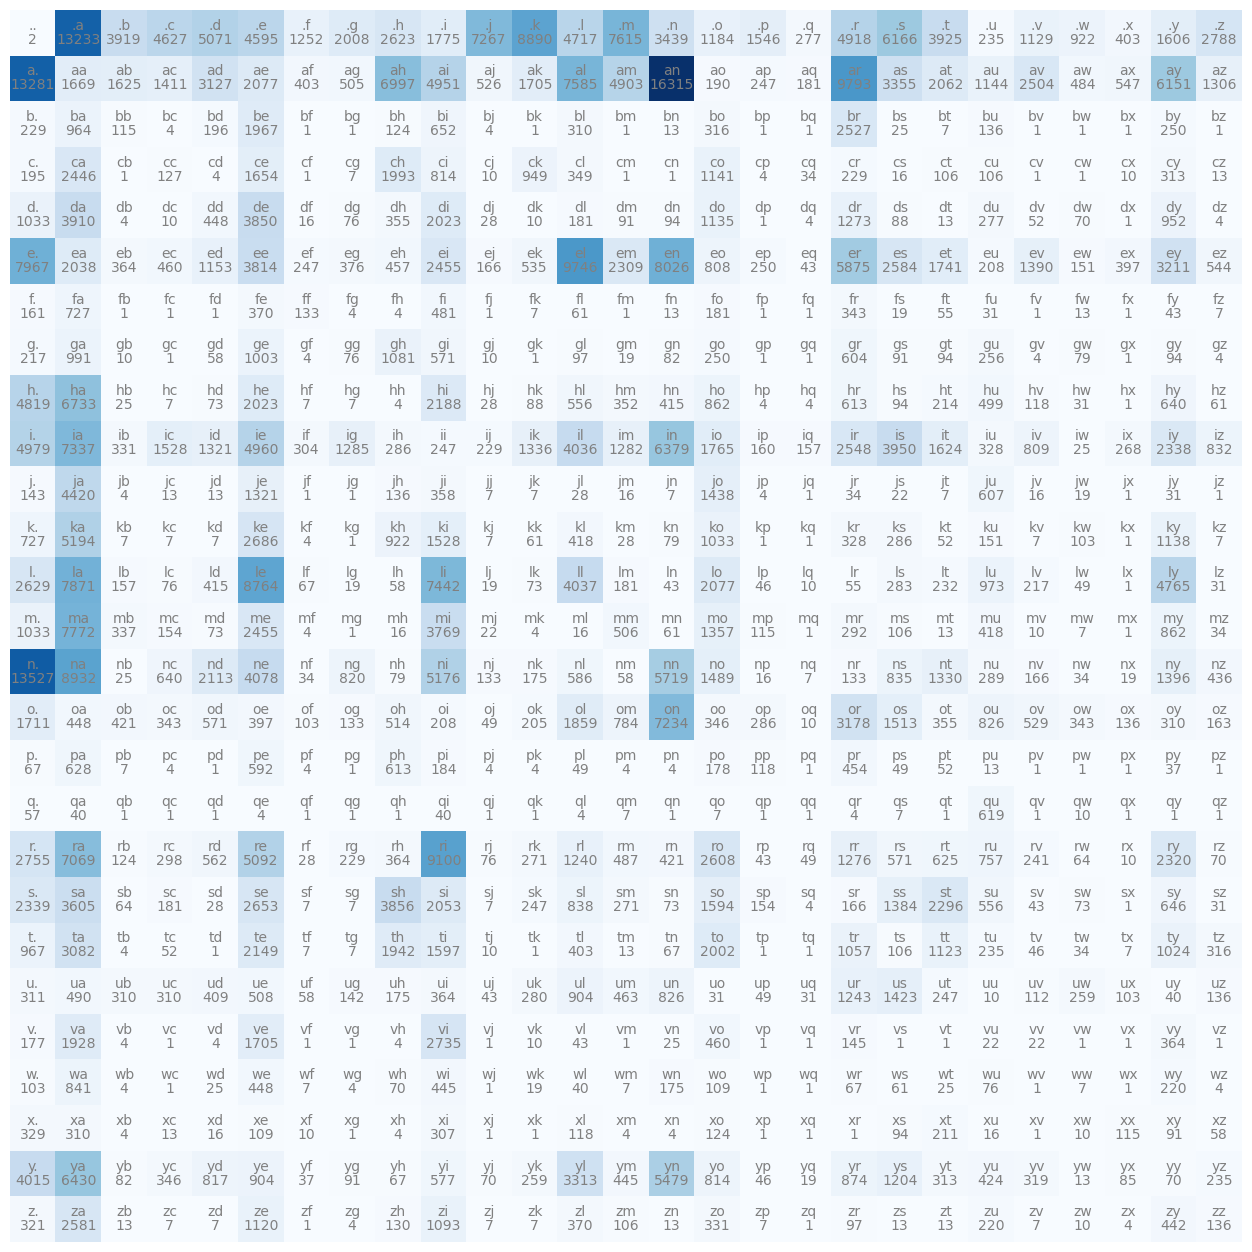

In [118]:
import matplotlib.pyplot as plt
#%matplotlib inline

plt.figure(figsize = (16,16))
plt.imshow(Count_Tensor, cmap = 'Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray')
        plt.text(j,i, Count_Tensor[i,j].item(), ha = 'center', va = 'top', color = 'gray')
plt.axis('off')
plt.show()

when starting char is v  then probability of other characters a-z,. likely to occur is: tensor([2.3107e-02, 2.5170e-01, 5.2219e-04, 1.3055e-04, 5.2219e-04, 2.2258e-01,
        1.3055e-04, 1.3055e-04, 5.2219e-04, 3.5705e-01, 1.3055e-04, 1.3055e-03,
        5.6136e-03, 1.3055e-04, 3.2637e-03, 6.0052e-02, 1.3055e-04, 1.3055e-04,
        1.8930e-02, 1.3055e-04, 1.3055e-04, 2.8721e-03, 2.8721e-03, 1.3055e-04,
        1.3055e-04, 4.7520e-02, 1.3055e-04])


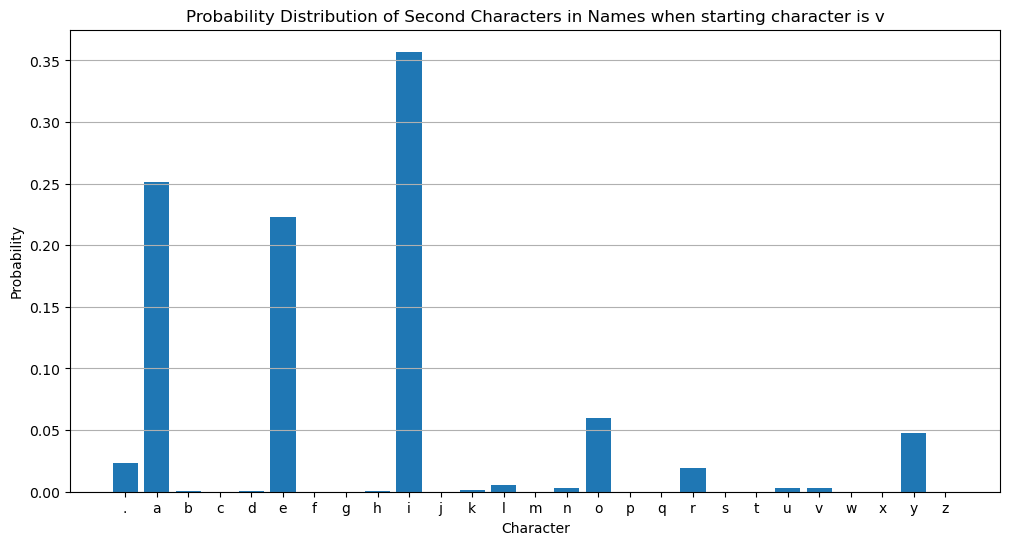

when starting character is v, we are mostly likely to get second charcter as : i
loss of the model prediction when 1st char is v and 2nd char is i is :  6.54656966527303


In [172]:
#probability of what is the second character when start charater is x
starting_character = 'v'
p = Count_Tensor[stoi[starting_character]]/Count_Tensor[stoi[starting_character]].sum()
probability_tensor = p
print(f"when starting char is {starting_character}  then probability of other characters a-z,. likely to occur is:", p)


import matplotlib.pyplot as plt

p = Count_Tensor[stoi[starting_character]]/Count_Tensor[stoi[starting_character]].sum()
# Convert to numpy for plotting
p_np = p.numpy()

# Create character labels using itos (ordered by index)
labels = [itos.get(i, f"[{i}]") for i in range(len(p_np))]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(range(len(p_np)), p_np)
plt.xticks(ticks=range(len(p_np)), labels=labels)
plt.xlabel('Character')
plt.ylabel('Probability')
plt.title(f'Probability Distribution of Second Characters in Names when starting character is {starting_character}')
plt.grid(True, axis='y')
plt.show()

print(f"when starting character is {starting_character}, we are mostly likely to get second charcter as :", itos[torch.argmax(p).item()])

##loss = -(log likelyhood of prediction 
sum,count = 0,0
for i in probability_tensor:
    sum += i.log().item()
    count += 1
    
#Neagtive log likely hodd

loss = -(sum/count)
print(f"loss of the model prediction when 1st char is {starting_character} and 2nd char is {itos[torch.argmax(p).item()]} is : ", loss)